In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
# Prepare the file directory
import os
for dirname, _, filenames in os.walk('C:\\Users\\phamd\\Big Data csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\phamd\Big Data csv\test.csv
C:\Users\phamd\Big Data csv\train.csv


In [6]:
# 2. Load data for Titanic
# Start working for analysis:
train_data = pd.read_csv("C:\\Users\\phamd\\Big Data csv\\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv('C:\\Users\\phamd\\Big Data csv\\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train_data = pd.read_csv("C:\\Users\\phamd\\Big Data csv\\train.csv")
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [28]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
# 3. Analyzing data: (Karen part)

In [31]:
# 4. Data cleaning: (Duc)
test_data['Age']
# So there is NA in the table

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [32]:
# Cleaning the data so there will be less redudant column
dropped_test = test_data.fillna(0)
dropped_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [11]:
# Cleaning the data of train.csv
dropped_train = train_data.fillna(0)
dropped_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
# 5. Try different model (e.g: Logistics, Random Forest, Decision tree, Classification)
# Making Random Forest Tree model
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [35]:
# Based on the coding below for applying tensorflow on building neutral network.
# 80% accuracy in train and dev set is not very good actually. I think other models such as Random Forest will produce better accuracy.
# Even if Logistic Regression should be used, using Tensorflow is not very efficient. There are many build-in libraries for Logistic Regression (e.g. Scikit-Learn).

In [37]:
# 6.1 Do some visualization with the finalized data
df = pd.read_csv('titanic.csv')
df.fillna(0, inplace = True)

In [38]:
# Visualization, predictive analysis
fig = plt.figure(dpi=1600)
alpha=alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
fig= plt.figure()


<Figure size 9600x6400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

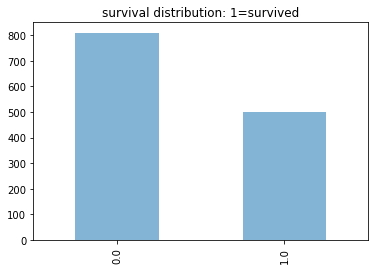

In [39]:
# Bar chart using cleansed data
df.survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("survival distribution: 1=survived")
plt.show

C:\Users\phamd\AppData\Local\Temp\ipykernel_45508\2930478759.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b =True, which ='major', axis='y')


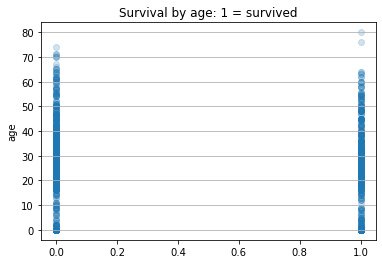

In [40]:
# Graph showing the survival by age
plt.scatter(df.survived, df.age, alpha=alpha_scatterplot)
plt.ylabel("age")
plt.grid(b =True, which ='major', axis='y')
plt.title("Survival by age: 1 = survived")
plt.show()

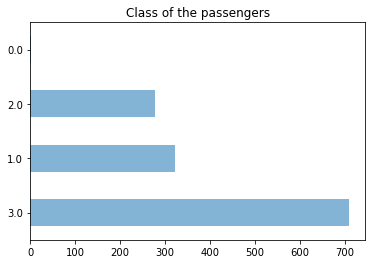

In [41]:
df.pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Class of the passengers")
plt.show()

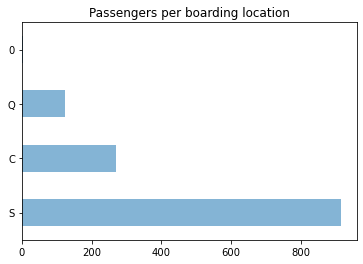

In [42]:
df.embarked.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Passengers per boarding location")
plt.show()

In [8]:
# Applying tensorflow:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [9]:
# Delete unnecessary e
del train['Name']
del train['Ticket']
del train['Fare']
del train['Embarked']

NameError: name 'train' is not defined

In [12]:
for i in range(dropped_train.shape[0]):
    if dropped_train.at[i, 'Sex'] == 'male':
        dropped_train.at[i, 'Sex'] = 1
    else:
        dropped_train.at[i, 'Sex'] = 0
dropped_train['Age_group'] = 0
for i in range(dropped_train.shape[0]):
    for j in range(70, 0, -10):
        if dropped_train.at[i, 'Age'] > j:
            dropped_train.at[i, 'Age_group'] = int(j/10)
            break
del dropped_train['Age'] # it's unnecessary anymore
print(list(set(dropped_train['Cabin'].values))[:10]) # sample of 'Cabin' values
dropped_train['Cabin_section'] = '0'
for i in range(dropped_train.shape[0]):
    if dropped_train.at[i, 'Cabin'] != 0:
        dropped_train.at[i, 'Cabin_section'] = dropped_train.at[i, 'Cabin'][0]
CABIN_SECTION = list(set(dropped_train['Cabin_section'].values)) # will be reused for test data
print(CABIN_SECTION) # 'Cabin_Section' values
for i in range(dropped_train.shape[0]):
        dropped_train.at[i, 'Cabin_section'] = CABIN_SECTION.index(dropped_train.at[i, 'Cabin_section'])
del dropped_train['Cabin'] # it's unnecessary anymore

[0, 'E68', 'F2', 'B20', 'A7', 'A32', 'D15', 'C104', 'C106', 'C87']
['E', '0', 'G', 'D', 'T', 'F', 'C', 'B', 'A']


In [46]:
dropped_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Cabin_section
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,2,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,3,2
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,3,4


In [13]:
pclass = np.eye(dropped_train['Pclass'].values.max()+1)[dropped_train['Pclass'].values]
age_group = np.eye(dropped_train['Age_group'].values.max()+1)[dropped_train['Age_group'].values]
cabin_section = np.eye(dropped_train['Cabin_section'].values.max()+1)                     [dropped_train['Cabin_section'].values.astype(int)] # prevent IndexError
X = dropped_train[['Sex', 'SibSp', 'Parch']].values
X = np.concatenate([X, age_group], axis=1)
X = np.concatenate([X, pclass], axis=1)
X = np.concatenate([X, cabin_section], axis=1)
X = X.astype(float)

y = dropped_train['Survived'].values
y = y.astype(float).reshape(-1, 1)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, y_train.shape)

(801, 24) (801, 1)


In [15]:
# Repeat for test:
del dropped_test['Name']
del dropped_test['Ticket']
del dropped_test['Fare']
del dropped_test['Embarked']

test = dropped_test.fillna(value=0.0)

test['Age_group'] = 0
test['Cabin_section'] = '0'
for i in range(test.shape[0]):
    if test.at[i, 'Sex'] == 'male':
        test.at[i, 'Sex'] = 1
    else:
        test.at[i, 'Sex'] = 0

    for j in range(70, 0, -10):
        if test.at[i, 'Age'] > j:
            test.at[i, 'Age_group'] = int(j/10)
            break

    if test.at[i, 'Cabin'] != 0:
        test.at[i, 'Cabin_section'] = test.at[i, 'Cabin'][0]
    test.at[i, 'Cabin_section'] = CABIN_SECTION.index(test.at[i, 'Cabin_section'])

del test['Cabin'] # it's unnecessary anymore
del test['Age'] # it's unnecessary anymore

NameError: name 'dropped_test' is not defined

In [49]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Age_group,Cabin_section
0,892,3,1,0,0,3,4
1,893,3,0,1,0,4,4
2,894,2,1,0,0,6,4
3,895,3,1,0,0,2,4
4,896,3,0,1,1,2,4


In [50]:
pclass_test = np.eye(test['Pclass'].values.max()+1)[test['Pclass'].values]
age_group_test = np.eye(test['Age_group'].values.max()+1)[test['Age_group'].values]
cabin_section_test = np.eye(test['Cabin_section'].values.max()+1) \
                    [test['Cabin_section'].values.astype(int)] # prevent IndexError

X_test = test[['Sex', 'SibSp', 'Parch']].values
X_test = np.concatenate([X_test, age_group_test], axis=1)
X_test = np.concatenate([X_test, pclass_test], axis=1)
X_test = np.concatenate([X_test, cabin_section_test], axis=1)
X_test = X_test.astype(float)

id_test = test['PassengerId'].values
id_test = id_test.reshape(-1, 1)
print(X_test.shape, id_test.shape)

(418, 24) (418, 1)


In [51]:
# Building the neutral network:
seed = 7 # for reproducible purpose
input_size = X_train.shape[1] # number of features
learning_rate = 0.001 # most common value for Adam
epochs = 8500 # I've tested previously that this is the best epochs to avoid overfitting

In [16]:
tf.compat
import tensorflow as tf
graph = tf.Graph()
with graph.as_default():
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
   
    x_input = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, input_size], name='X_input')
    y_input = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1], name='y_input')
    
    W1 = tf.Variable(tf.random.normal(shape=[input_size, 1], seed=seed), name='W1')
    b1 = tf.Variable(tf.random.normal(shape=[1], seed=seed), name='b1')
    sigm = tf.nn.sigmoid(tf.add(tf.matmul(x_input, W1), b1), name='pred')
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_input,
                                                                  logits=sigm, name='loss'))
    train_steps = tf.keras.optimizers.Adam(learning_rate).minimize(loss, var_list = None)
    var1, var2 = tf.Variable(1.0), tf.varible

    pred = tf.cast(tf.greater_equal(sigm, 0.5), tf.float32, name='pred') # 1 if >= 0.5
    acc = tf.reduce_mean(tf.cast(tf.equal(pred, y_input), tf.float32), name='acc')
    
    init_var = tf.global_variables_initializer()
train_feed_dict = {x_input: x_train, y_input: y_train}
dev_feed_dict = {x_input: x_dev, y_input: y_dev}
test_feed_dict = {x_input: x_test} # no y_input since the goal is to predict it

NameError: name 'seed' is not defined

In [ ]:
sess = tf.Session(graph=graph)
sess.run(init_var)

In [ ]:
cur_loss = sess.run(loss, feed_dict=train_feed_dict)
train_acc = sess.run(acc, feed_dict=train_feed_dict)
test_acc = sess.run(acc, feed_dict=dev_feed_dict)
print('step 0: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(
                       cur_loss, 100*train_acc, 100*test_acc))
for step in range(1, epochs+1):
    sess.run(train_steps, feed_dict=train_feed_dict)
    cur_loss = sess.run(loss, feed_dict=train_feed_dict)
    train_acc = sess.run(acc, feed_dict=train_feed_dict)
    test_acc = sess.run(acc, feed_dict=dev_feed_dict)
    if step%100 != 0: # print result every 100 steps
        continue
    print('step {3}: loss {0:.5f}, train_acc {1:.2f}%, test_acc {2:.2f}%'.format(
                       cur_loss, 100*train_acc, 100*test_acc, step))

In [ ]:
y_pred = sess.run(pred, feed_dict=test_feed_dict).astype(int)
prediction = pd.DataFrame(np.concatenate([id_test, y_pred], axis=1),
                          columns=['PassengerId', 'Survived'])
prediction.head()

In [56]:
# 6.2 Would me and another passernger survived the trip:
from tensorflow import keras
from sklearn import preprocessing
import numpy
numpy.random.seed(10)


In [57]:
all_df = pd.read_excel("C:\\Users\\phamd\\titanic3.xls")

In [58]:
cols=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [59]:
# Using numpy to separate a dataset between train and test portions which in this case 80% and 20%
msk = numpy.random.rand( len(all_df) ) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [60]:
print('total:', len(all_df))
print('train:', len(train_df))
print('test:', len(test_df))

total: 1309
train: 1034
test: 275


In [61]:
# Using preprocessing to take care of missing values in age and fare
# Transform the attributes sex to number 0/1
# Scale the values of fare to be between 0/1
def preprocess_data(raw_df):
    df = raw_df.drop( ['name'], axis=1 )
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map( {'female':0, 'male':1} ).astype(int)
    x_one_hot_df = pd.get_dummies( data=df, columns=["embarked" ])
    
    nd_array = x_one_hot_df.values
    feature = nd_array[:, 1:]
    label = nd_array[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler( feature_range=(0,1) )
    scaled_features = minmax_scale.fit_transform( feature )
    
    return scaled_features,label

In [62]:
train_features, train_label = preprocess_data( train_df )
test_features, test_label = preprocess_data( test_df )

In [63]:
train_features[:5]

array([[0.        , 0.        , 0.38844819, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00679502, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.02151711, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.40203823, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.33408803, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [64]:
train_label[:5]

array([1., 1., 0., 0., 0.])

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [66]:
# Assigning nodes for each layer; in this case 40, 30, and 1 for output as value of output is either survived/dead
model = Sequential()

model.add( Dense(units=40, input_dim=9, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=30, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=1, kernel_initializer='uniform', activation='sigmoid') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                400       
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [68]:
train_history = model.fit( x=train_features, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Epoch 1/30
31/31 - 1s - loss: 0.6896 - accuracy: 0.5903 - val_loss: 0.6704 - val_accuracy: 0.7885 - 1s/epoch - 45ms/step
Epoch 2/30
31/31 - 0s - loss: 0.6654 - accuracy: 0.6129 - val_loss: 0.5880 - val_accuracy: 0.7885 - 75ms/epoch - 2ms/step
Epoch 3/30
31/31 - 0s - loss: 0.6045 - accuracy: 0.6892 - val_loss: 0.4872 - val_accuracy: 0.8077 - 66ms/epoch - 2ms/step
Epoch 4/30
31/31 - 0s - loss: 0.5441 - accuracy: 0.7570 - val_loss: 0.4676 - val_accuracy: 0.7788 - 80ms/epoch - 3ms/step
Epoch 5/30
31/31 - 0s - loss: 0.5068 - accuracy: 0.7591 - val_loss: 0.4405 - val_accuracy: 0.7500 - 81ms/epoch - 3ms/step
Epoch 6/30
31/31 - 0s - loss: 0.4970 - accuracy: 0.7538 - val_loss: 0.4409 - val_accuracy: 0.7885 - 84ms/epoch - 3ms/step
Epoch 7/30
31/31 - 0s - loss: 0.4839 - accuracy: 0.7613 - val_loss: 0.4447 - val_accuracy: 0.7885 - 92ms/epoch - 3ms/step
Epoch 8/30
31/31 - 0s - loss: 0.4792 - accuracy: 0.7677 - val_loss: 0.4317 - val_accuracy: 0.7885 - 78ms/epoch - 3ms/step
Epoch 9/30
31/31 - 0s - l

In [69]:
Duc = pd.Series( [0, 'Duc', 3, 'male', 23, 0, 0, 5.0000, 'S'] )
Woman = pd.Series( [1, 'Woman', 1, 'female', 30, 1, 0, 100.0000, 'S'] )
Mike = pd.Series( [0, 'Mike', 1, 'male', 32, 0, 0, 55.0000, 'C'])

In [70]:
me_woman_df = pd.DataFrame( [list(Duc), list(Woman), list(Mike)], columns=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'] )

In [71]:
all_df = pd.concat( [all_df, me_woman_df] )

In [72]:
all_df[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Duc,3,male,23.0,0,0,5.0,S
1,1,Woman,1,female,30.0,1,0,100.0,S
2,0,Mike,1,male,32.0,0,0,55.0,C


In [73]:
all_df[-5:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Duc,3,male,23.0,0,0,5.000,S
1,1,Woman,1,female,30.0,1,0,100.000,S
2,0,Mike,1,male,32.0,0,0,55.000,C


In [74]:
all_feature, label = preprocess_data(all_df)

In [75]:
all_probability = model.predict(all_feature)

41/41 [==============================] - 0s 1ms/step


In [76]:
all_probability[:10]

array([[0.9677942 ],
       [0.5259396 ],
       [0.9697181 ],
       [0.31906384],
       [0.9628708 ],
       [0.21674313],
       [0.9130789 ],
       [0.26831323],
       [0.91385984],
       [0.27409315]], dtype=float32)

In [77]:
pd = all_df
pd.insert( len(all_df.columns), 'probability', all_probability)

In [78]:
pd[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Duc,3,male,23.0,0,0,5.0,S,0.136787
1,1,Woman,1,female,30.0,1,0,100.0,S,0.956188
2,0,Mike,1,male,32.0,0,0,55.0,C,0.520036


In [17]:
# In conclusion, it is predicted that I won't be able to survive while the 30 years old Woman will have more chance to survive.